In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [2]:
class CustomDataset(tf.data.Dataset):
    def __init__(self, path):
        self.video_paths = [os.path.join(path, dir_path) for dir_path in os.listdir(path)]
        self.num_samples = 0

        # Load the mask shape from the first video path
        mask_sample_path = os.path.join(self.video_paths[0], 'mask.npy')
        mask_shapes = np.load(mask_sample_path).shape

        # Calculate the total number of samples
        self.num_samples = mask_shapes[0] * len(self.video_paths)

    def _inputs(self):
        return []  # No inputs

    def element_spec(self):
        image_shape = tf.TensorShape([None, None, 3])
        mask_shape = tf.TensorShape([None])
        return (image_shape, mask_shape)

    def _generator(self):
        for path in self.video_paths:
            mask_path = os.path.join(path, 'mask.npy')
            masks = np.load(mask_path)  # Load all masks at once

            for i in range(masks.shape[0]):
                image_path = os.path.join(path, f'image_{i}.png')
                image_data = tf.io.read_file(image_path)
                image = tf.image.decode_png(image_data, channels=3)
                mask = masks[i]  # Get the corresponding mask
                yield image, mask

    def __len__(self):
        return self.num_samples

    def __iter__(self):
        return self._generator()

In [3]:
path = '/content/videos'
custom_dataset = CustomDataset(path)

In [4]:
for image, mask in custom_dataset:
    print("Image shape:", image.shape)
    print("Mask shape:", mask.shape)

Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)
Image shape: (160, 240, 3)
Mask shape: (160, 240)


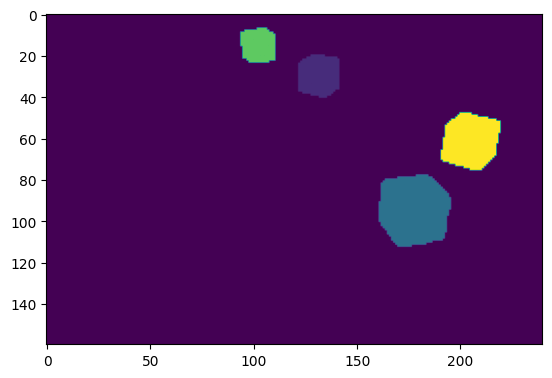

In [5]:
plt.imshow(mask)

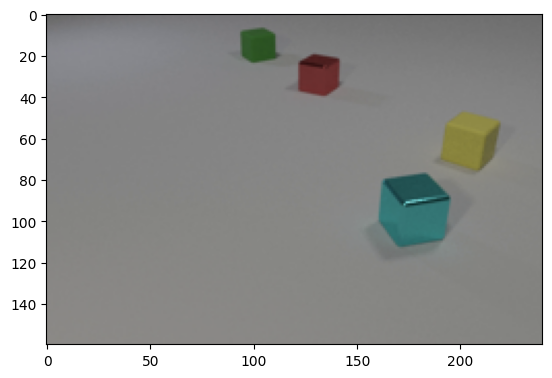

In [6]:
plt.imshow(image)